In [1]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta #moving avg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#load the data 
xrt_df = pd.read_csv('XRT.csv')

In [3]:
xrt_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-03,43.689999,43.955002,43.645000,43.799999,38.968216,4769600
1,2014-01-06,43.750000,43.924999,43.334999,43.380001,38.594555,5658200
2,2014-01-07,43.535000,43.705002,43.259998,43.450001,38.656826,7025200
3,2014-01-08,43.404999,43.450001,43.084999,43.244999,38.474434,5277200
4,2014-01-09,43.340000,43.340000,42.654999,42.904999,38.171951,7345000


In [4]:
#Inspect it 
print(xrt_df)

            Date       Open       High        Low      Close  Adj Close  \
0     2014-01-03  43.689999  43.955002  43.645000  43.799999  38.968216   
1     2014-01-06  43.750000  43.924999  43.334999  43.380001  38.594555   
2     2014-01-07  43.535000  43.705002  43.259998  43.450001  38.656826   
3     2014-01-08  43.404999  43.450001  43.084999  43.244999  38.474434   
4     2014-01-09  43.340000  43.340000  42.654999  42.904999  38.171951   
...          ...        ...        ...        ...        ...        ...   
2169  2022-08-16  71.849998  75.790001  71.529999  74.349998  74.349998   
2170  2022-08-17  73.150002  73.489998  71.720001  72.230003  72.230003   
2171  2022-08-18  71.989998  72.070000  70.949997  71.720001  71.720001   
2172  2022-08-19  70.800003  71.139999  69.029999  69.419998  69.419998   
2173  2022-08-22  68.180000  68.300003  67.059998  67.230003  67.230003   

       Volume  
0     4769600  
1     5658200  
2     7025200  
3     5277200  
4     7345000  
...

In [5]:
#print the summary 
print(xrt_df.describe())

              Open         High          Low        Close    Adj Close  \
count  2174.000000  2174.000000  2174.000000  2174.000000  2174.000000   
mean     52.057183    52.558774    51.513429    52.043335    49.224037   
std      16.643219    16.887788    16.349743    16.613608    17.285598   
min      27.549999    27.770000    26.290001    26.990000    26.168465   
25%      42.601248    42.952500    42.271251    42.650002    39.146802   
50%      45.135000    45.500000    44.790001    45.182501    41.999617   
75%      50.655000    50.987501    50.343749    50.667499    48.016634   
max     104.160004   104.309998   102.410004   104.160004   102.392715   

             Volume  
count  2.174000e+03  
mean   4.859034e+06  
std    2.598077e+06  
min    5.547000e+05  
25%    3.055200e+06  
50%    4.336900e+06  
75%    6.045500e+06  
max    3.274590e+07  


In [6]:
# load data set 2
xrt_df2 = pd.read_csv('XRT_2020_2022.csv')

In [7]:
xrt_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-03,45.040001,45.500000,45.009998,45.310001,43.655869,4236000
1,2020-01-06,45.099998,45.549999,44.930000,45.470001,43.810032,3350300
2,2020-01-07,45.500000,45.680000,45.020000,45.310001,43.655869,2889600
3,2020-01-08,45.730000,45.779999,45.189999,45.400002,43.742584,4679700
4,2020-01-09,45.450001,45.500000,44.900002,45.209999,43.559521,5148700


In [8]:
#Inspect the 2020-2022
print(xrt_df2)

           Date       Open       High        Low      Close  Adj Close  \
0    2020-01-03  45.040001  45.500000  45.009998  45.310001  43.655869   
1    2020-01-06  45.099998  45.549999  44.930000  45.470001  43.810032   
2    2020-01-07  45.500000  45.680000  45.020000  45.310001  43.655869   
3    2020-01-08  45.730000  45.779999  45.189999  45.400002  43.742584   
4    2020-01-09  45.450001  45.500000  44.900002  45.209999  43.559521   
..          ...        ...        ...        ...        ...        ...   
663  2022-08-22  68.180000  68.300003  67.059998  67.230003  67.230003   
664  2022-08-23  67.699997  68.660004  67.260002  67.349998  67.349998   
665  2022-08-24  66.879997  67.550003  66.150002  66.629997  66.629997   
666  2022-08-25  66.529999  68.349998  66.070000  67.910004  67.910004   
667  2022-08-26  68.169998  68.459999  65.470001  65.550003  65.550003   

      Volume  
0    4236000  
1    3350300  
2    2889600  
3    4679700  
4    5148700  
..       ...  
663  7

In [9]:
#print the summary 
print(xrt_df2.describe())

             Open        High         Low       Close   Adj Close  \
count  668.000000  668.000000  668.000000  668.000000  668.000000   
mean    69.413263   70.287246   68.436766   69.374416   68.141050   
std     21.176683   21.366038   20.931750   21.127429   20.978257   
min     27.549999   27.770000   26.290001   26.990000   26.168463   
25%     50.785001   51.254999   50.009998   50.787501   49.370038   
50%     70.790001   71.979999   69.960003   71.439999   70.319820   
75%     91.220001   92.262499   89.997501   90.959999   89.268957   
max    104.160004  104.309998  102.410004  104.160004  102.392715   

             Volume  
count  6.680000e+02  
mean   4.400997e+06  
std    2.808209e+06  
min    5.547000e+05  
25%    2.474750e+06  
50%    3.722100e+06  
75%    5.552800e+06  
max    3.274590e+07  


In [10]:
#now prep the data for 2014-2019
xrt_df.set_index(pd.DatetimeIndex(xrt_df['Date']), inplace=True)

In [11]:
#now prep the data for 2020-2022
xrt_df2.set_index(pd.DatetimeIndex(xrt_df2['Date']), inplace=True)

In [12]:
#Keep the close for 2014-19
xrt_df = xrt_df[['Close']]

In [13]:
print(xrt_df)

                Close
Date                 
2014-01-03  43.799999
2014-01-06  43.380001
2014-01-07  43.450001
2014-01-08  43.244999
2014-01-09  42.904999
...               ...
2022-08-16  74.349998
2022-08-17  72.230003
2022-08-18  71.720001
2022-08-19  69.419998
2022-08-22  67.230003

[2174 rows x 1 columns]


In [14]:
#Keep the close 2020-22
xrt_df2 = xrt_df2[['Close']]

In [15]:
print(xrt_df2)

                Close
Date                 
2020-01-03  45.310001
2020-01-06  45.470001
2020-01-07  45.310001
2020-01-08  45.400002
2020-01-09  45.209999
...               ...
2022-08-22  67.230003
2022-08-23  67.349998
2022-08-24  66.629997
2022-08-25  67.910004
2022-08-26  65.550003

[668 rows x 1 columns]


In [16]:
#Create a Variable to predict 2020-2022
prediction_days = 599

# Create an new column that targets the data and 
# predict values of x day away from the current price 
xrt_df['Actual Prediction'] = xrt_df[['Close']].shift(-prediction_days)


In [17]:
#print the new column for 2014-19
xrt_df

,Close,Actual Prediction
Date,,
2014-01-03,43.799999,41.259998
2014-01-06,43.380001,40.869999
2014-01-07,43.450001,41.200001
2014-01-08,43.244999,41.700001
2014-01-09,42.904999,41.810001
...,...,...
2022-08-16,74.349998,NaN
2022-08-17,72.230003,NaN
2022-08-18,71.720001,NaN


In [18]:
# Create independent dataset X and create a numpy array
X=X = np.array(xrt_df[['Close']])

In [19]:
#Git rid of any Nan/rows 
X=X[:-prediction_days]
#print(X)

In [20]:
#Creat the dependetnt data for Y
Y=xrt_df['Actual Prediction'].values


In [21]:
Y=Y[:-prediction_days]
# print(Y)

In [22]:
# train and test ratio is 70% traing and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [23]:
#Creat the model
l_r = LinearRegression()
#train the model
l_r.fit(x_train, y_train)

LinearRegression()

In [24]:
#test the model using score
linear_score=l_r.score(x_test,y_test)
print(linear_score)

-0.009331869442458007


In [25]:
#well I think that im going to predict the last 500days.
acutal_days=np.array(xrt_df[['Close']])[-prediction_days:]
# acutal_days

In [26]:
#print the liner regression prediction  for the next 599 days

linear_prediction=l_r.predict(acutal_days)

# linear_prediction


In [27]:
#okay this is were we put the 2020-2022 data in 
actual_20_22=np.array(xrt_df2[['Close']])
# actual_20_22

In [28]:
linear_prediction.shape

(599,)

In [29]:
actual_20_22.shape 

(668, 1)

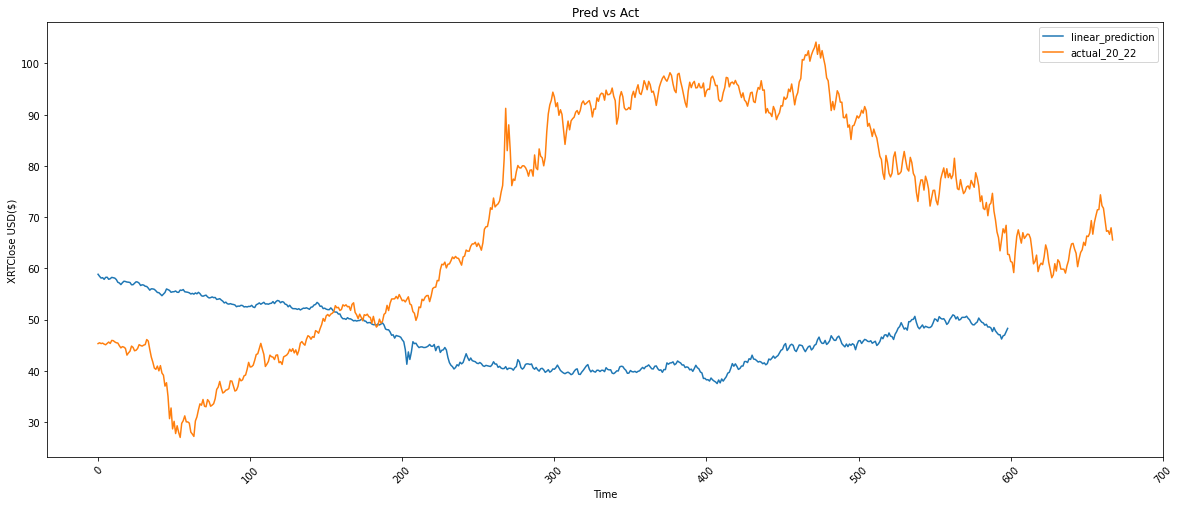

In [30]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(linear_prediction) # lable='Prediction' , lw=2, alpha=.7)
plt.plot(actual_20_22) #  , lable='Actual') # , lw=2, alpha=.7)
plt.title('Pred vs Act')
plt.xlabel('Time')
plt.ylabel('XRTClose USD($)')
plt.legend(['linear_prediction', 'actual_20_22'])
plt.xticks(rotation=45)
plt.show()